# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import os
import json
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

archive=pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#define a variable for the called 'url' to hold the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
response

<Response [200]>

In [4]:
#write the content of the 'response' variable to the file specified and export to a datafframe
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)
image_preds=pd.read_csv('image-predictions.tsv',sep='\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
#I changed the error Exception since the earlier one was giving an error on my platform it was previously `tweepy.TweepError`
        except AttributeError as e: 
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# Read the file line by line
with open("tweet-json.txt") as file:
    lines = file.readlines()

# Create an empty DataFrame
json_df = pd.DataFrame(columns=['tweet_id', 'favorite_count', 'retweet_count'])

# Iterate over each line, extract the key-value pairs and add them to the DataFrame
for line in lines:
    data = json.loads(line)
    id = data['id']
    favorite_count = data['favorite_count']
    retweet_count = data['retweet_count']
    json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
    
json_df.head()

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\A

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\A

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\A

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\A

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\A

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\AppData\Local\Temp\ipykernel_1268\37336660.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append({'tweet_id': id, 'favorite_count': favorite_count, 'retweet_count': retweet_count}, ignore_index=True)
C:\Users\marko\A

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data

In [6]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [9]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [11]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [12]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
archive.tweet_id.duplicated().sum()

0

In [15]:
image_preds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_preds.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [19]:
image_preds.shape

(2075, 12)

In [20]:
json_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [21]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   object
 2   retweet_count   2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [22]:
json_df.describe()

,tweet_id,favorite_count,retweet_count
count,2354,2354,2354
unique,2354,2007,1724
top,892420643555336193,0,1972
freq,1,179,5


### Quality issues
#### `archive` table
1. `tweet_id` is an object not an integer

2. Missing records in several columns namely:
* `in_reply_to_status_id`
* `in_reply_to_user_id`
* `retweeted_status_id`
* `retweeted_status_user_id`
* `retweeted_status_timestamp`
* `expanded_urls`

3. Duplicates in `name` columm e.g canela

4. `timestamp` column is datetime not object

5. Correct values in `rating_numerator` with decimals

6. Keep original ratings and not retweets

7. `text` column includes texts and urls.

8. `source` column values in html  

#### `image_preds` table

1. `tweet_id` is an object not an integer

2. `img_num` is an object, not an integer

3. Missing records(2075 instead of 2356)


#### `json_df` table 

1. Missing records in table (2354 instead 2356)

2. `favorite_count` and `retweet_count` datatype should be integers not strings/object

### Tidiness issues
1. Columns `doggo`, `floofer`,`pupper` and `puppo` in `archive` table to be merged into one column called dog_stages.

2. `image_preds` and `json_df` table to be merged with the archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_clean = image_preds.copy()
json_clean = json_df.copy()

In [24]:
archive_clean.shape

(2356, 17)

In [25]:
image_clean.shape

(2075, 12)

In [26]:
json_clean.shape

(2354, 3)

### Issue #1: `archive_clean` - Keep original tweets and not retweets and replies

#### Define: 

Extract the retweets and replies by checking the values in the ` retweeted_status_id` and `in_reply_to_status_id ` columns and dropping them from the dataframe

#### Code

In [27]:
# extract non-null values in column `retweeted_status_id`vand put them in a dataframe
retweets = archive_clean[archive_clean['retweeted_status_id'].notnull()]
# extract non-null values in column `in_reply_to_status_id`vand put them in a dataframe
replies= archive_clean[archive_clean['in_reply_to_status_id'].notnull()]

In [28]:
# drop the rows with non-null values in the specified columns from original dataframe
archive_clean = archive_clean.drop(retweets.index)
archive_clean = archive_clean.drop(replies.index)

#### Test

In [29]:
archive_clean.shape

(2097, 17)

The number of columns have been trimmed from 2356 to 2097

### Issue #2: `archive_clean` - Missing records in several columns

#### Define
We are going to drop columns with high number null values.
These will be the following columns:
* `in_reply_to_status_id`
* `in_reply_to_user_id `
* `retweeted_status_id`
* `retweeted_status_user_id`
* `retweeted_status_timestamp`

#### Code

In [30]:
archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

#### Test

In [31]:
archive_clean.shape

(2097, 12)

The number of columns has reduced from 17 to 12

### Issue #3: Fix Datatypes in all three tables

#### Define

* From the `image_clean` table, we'll change the dtype of column `tweet_id` from int64 to object using the astype() function.
* From the `archive_clean` table, we'll change the dtype of column `timestamp` from object to datetime using pandas to_datetime() function.
* From the `archive_clean` table, we'll change the dtype of column `tweet_id` from int64 to object using the astype() function.
* From the `json_clean` table, we'll change the dtype of columns `retweet_count` and `favorite_count` from object to integer using the astype() function.
* From the `image_clean` table, we'll change the dtype of column `img_num` from int64 to object using the astype() function.

#### Code

In [32]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
image_clean.img_num = image_clean.img_num.astype('str')
json_clean['favorite_count']=json_clean['favorite_count'].astype('int')
json_clean['retweet_count']=json_clean['favorite_count'].astype('int')

#### Test

In [33]:
archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [34]:
image_clean.dtypes

tweet_id     object
jpg_url      object
img_num      object
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [35]:
json_clean.dtypes

tweet_id          object
favorite_count     int32
retweet_count      int32
dtype: object

### Issue #4: `archive_clean` -  Remove urls from `text` column

#### Define

In the `text` column the entries also have urls which make the presentation 'busy'. We'll remove this using the str.replace() method to remove these urls

#### Code

In [36]:
archive_clean['text'] = archive_clean['text'].str.replace(r'https.*', '')

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\2518867135.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['text'] = archive_clean['text'].str.replace(r'https.*', '')


#### Test

In [37]:
#Use a loop to confirm that the urls at the end of the lines in each row is removed
for row in archive_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below


When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 
This is Zoey. She doesn't want to be one of the sca

### Issue #5: `archive_clean` - Clean up `source` column

#### Define

The values in the source column are in html format and we just need the source name. We'll use `BeautifulSoup.get_text()` method with a `lambda` function to achieve this.

#### Code

In [38]:
archive_clean['source'] = archive_clean['source'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

This uses the `apply()` function to apply the `get_text()` method to each element in the `source` column, then extracts the text from the HTML lines and update the corresponding value in the `source` column.

#### Test

In [39]:
archive_clean.source.sample(10)

553     Twitter for iPhone
1351    Twitter for iPhone
1057    Twitter for iPhone
748     Twitter for iPhone
82      Twitter for iPhone
976              TweetDeck
1407    Twitter for iPhone
1390    Twitter for iPhone
1685    Twitter for iPhone
646     Twitter for iPhone
Name: source, dtype: object

### Issue #6: `archive` - Correct values in `rating_numerator` column

#### Define

Fix incorrect values in the `rating_numerator` column

#### Code

In [40]:
#check the text column for ratings and compare with the values in rating_numerator and rating_denominator
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\3823599377.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10


We then replace the incorrect values in the ratings columns with the correct values from the text column

In [41]:
 # convert to float datatype
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

#update values using np.where()
archive_clean['rating_numerator'] = np.where(archive_clean.tweet_id == '883482846933004288', 13.5, archive_clean['rating_numerator'])
archive_clean['rating_numerator'] = np.where(archive_clean.tweet_id == '786709082849828864', 9.75, archive_clean['rating_numerator'])
archive_clean['rating_numerator'] = np.where(archive_clean.tweet_id == '778027034220126208', 11.27, archive_clean['rating_numerator'])

#### Test

In [42]:
#check the text column for ratings and compare with the values in rating_numerator and rating_denominator
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\3823599377.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26.00,10.0


### Tidiness

### Issue #7: `archive` - Merge the dog_stage columns into one column

#### Define

Use a function to merge `doggo`, `floofer`,`pupper` and `puppo` in archive table into one column called `dog_stage`

#### Code

In [43]:
archive_clean['dog_cols'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
#create function to check dog stages
def check_stages(archive):
    if archive['dog_cols'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['dog_cols'].count('doggo') == 1:
            return 'doggo'
        elif archive['dog_cols'].count('floofer') == 1:
            return 'floofer'
        elif archive['dog_cols'].count('pupper') == 1:
            return 'pupper'
        elif archive['dog_cols'].count('puppo') == 1:
            return 'puppo'
        else:
            return 'None'

archive_clean['dog_stage'] = archive_clean.apply(check_stages, axis=1)
# drop columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'dog_cols'], axis=1, inplace=True)

#### Test

In [44]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None


In [45]:
archive_clean.shape

(2097, 9)

### Issue #8: Combine the tables

#### Define

Merge the 3 tables together using `pd.concat()`

#### Code

In [46]:
twitter_archive_master=pd.concat([archive_clean,image_clean], axis=1, join='inner')
twitter_archive_master=pd.concat([twitter_archive_master,json_clean], axis=1, join='inner')
twitter_archive_master =twitter_archive_master.loc[:,~twitter_archive_master.columns.duplicated()]
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1822 non-null   object             
 1   timestamp           1822 non-null   datetime64[ns, UTC]
 2   source              1822 non-null   object             
 3   text                1822 non-null   object             
 4   expanded_urls       1819 non-null   object             
 5   rating_numerator    1822 non-null   float64            
 6   rating_denominator  1822 non-null   float64            
 7   name                1822 non-null   object             
 8   dog_stage           1822 non-null   object             
 9   jpg_url             1822 non-null   object             
 10  img_num             1822 non-null   object             
 11  p1                  1822 non-null   object             
 12  p1_conf             1822 non-null 

In [47]:
twitter_archive_master.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         3
rating_numerator      0
rating_denominator    0
name                  0
dog_stage             0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
favorite_count        0
retweet_count         0
dtype: int64

In [48]:
twitter_archive_master.dropna(axis=0, inplace = True)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 2074
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1819 non-null   object             
 1   timestamp           1819 non-null   datetime64[ns, UTC]
 2   source              1819 non-null   object             
 3   text                1819 non-null   object             
 4   expanded_urls       1819 non-null   object             
 5   rating_numerator    1819 non-null   float64            
 6   rating_denominator  1819 non-null   float64            
 7   name                1819 non-null   object             
 8   dog_stage           1819 non-null   object             
 9   jpg_url             1819 non-null   object             
 10  img_num             1819 non-null   object             
 11  p1                  1819 non-null   object             
 12  p1_conf             1819 non-null 

#### Test

In [49]:
twitter_archive_master.shape

(1819, 22)

In [50]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,25461,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41048,41048


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
# Storing the new twitter_dogs df to a new csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data

In [52]:
twitter = pd.read_csv('twitter_archive_master.csv')
twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,25461,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41048,41048


In [53]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1819 non-null   int64  
 1   timestamp           1819 non-null   object 
 2   source              1819 non-null   object 
 3   text                1819 non-null   object 
 4   expanded_urls       1819 non-null   object 
 5   rating_numerator    1819 non-null   float64
 6   rating_denominator  1819 non-null   float64
 7   name                1819 non-null   object 
 8   dog_stage           1819 non-null   object 
 9   jpg_url             1819 non-null   object 
 10  img_num             1819 non-null   int64  
 11  p1                  1819 non-null   object 
 12  p1_conf             1819 non-null   float64
 13  p1_dog              1819 non-null   bool   
 14  p2                  1819 non-null   object 
 15  p2_conf             1819 non-null   float64
 16  p2_dog

In [54]:
# Change the datatypes of the below columns since they have changed after saving the master to csv
twitter.tweet_id = twitter.tweet_id.astype(str)
twitter.dog_stage = twitter.dog_stage.astype("category")
twitter.source = twitter.source.astype("category")
twitter.timestamp = pd.to_datetime(twitter.timestamp)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1819 non-null   object             
 1   timestamp           1819 non-null   datetime64[ns, UTC]
 2   source              1819 non-null   category           
 3   text                1819 non-null   object             
 4   expanded_urls       1819 non-null   object             
 5   rating_numerator    1819 non-null   float64            
 6   rating_denominator  1819 non-null   float64            
 7   name                1819 non-null   object             
 8   dog_stage           1819 non-null   category           
 9   jpg_url             1819 non-null   object             
 10  img_num             1819 non-null   int64              
 11  p1                  1819 non-null   object             
 12  p1_conf             1819 non-null 

### Insights:
1. Check the total number of tweets over time.

2. Most popular dog names

3. Most used Twitter Source

4. Check whether there's a correlation between `Favorite_count` and `Retweet_count`

### Visualization

### 1: Total number of Tweets over Time

In [55]:
monthly_tweets = twitter.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

C:\Users\marko\AppData\Local\Temp\ipykernel_1268\1582548644.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    1819
dtype: int64

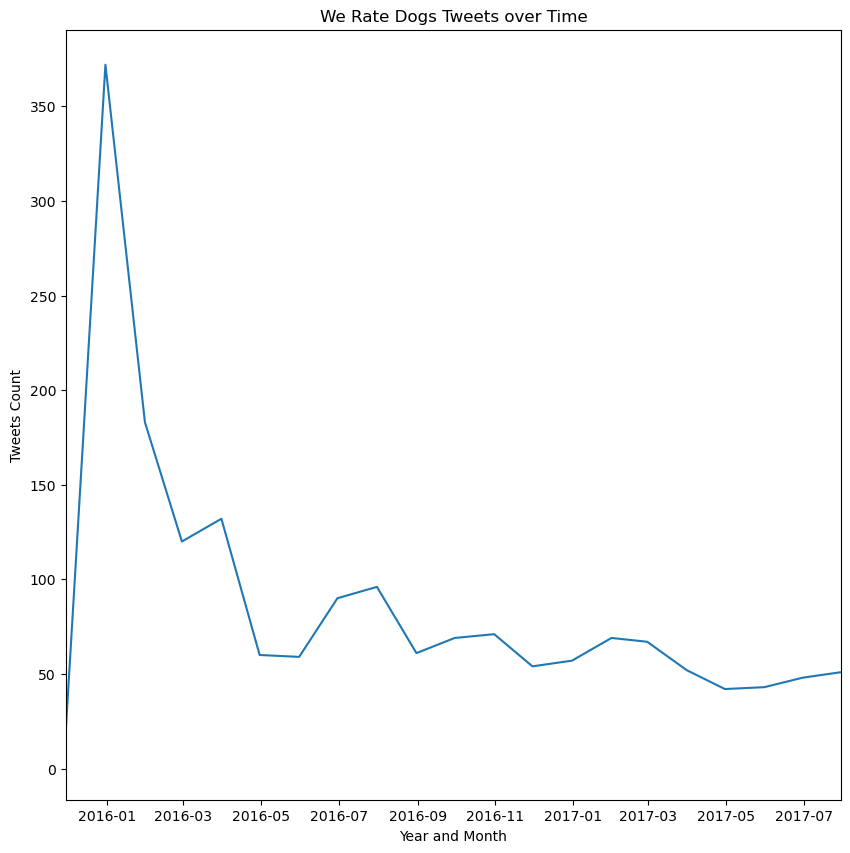

In [56]:
# Plotting time vs. tweets

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

We can see that over time the number of tweets sharrply decreases. However, in the early stages the tweets increased drastically before nosediving as from January 2016 after which the number of tweets have progressively decreasing over time.

### 2: Most Popular dog Names

To get the most popular dog names we'll perform a slice on the value_counts of the `name` column

In [57]:
twitter.name.value_counts()

None           510
a               27
Lucy            11
Charlie         11
Cooper          10
              ... 
Heinrich         1
Shakespeare      1
Chelsea          1
Bungalo          1
Holly            1
Name: name, Length: 856, dtype: int64

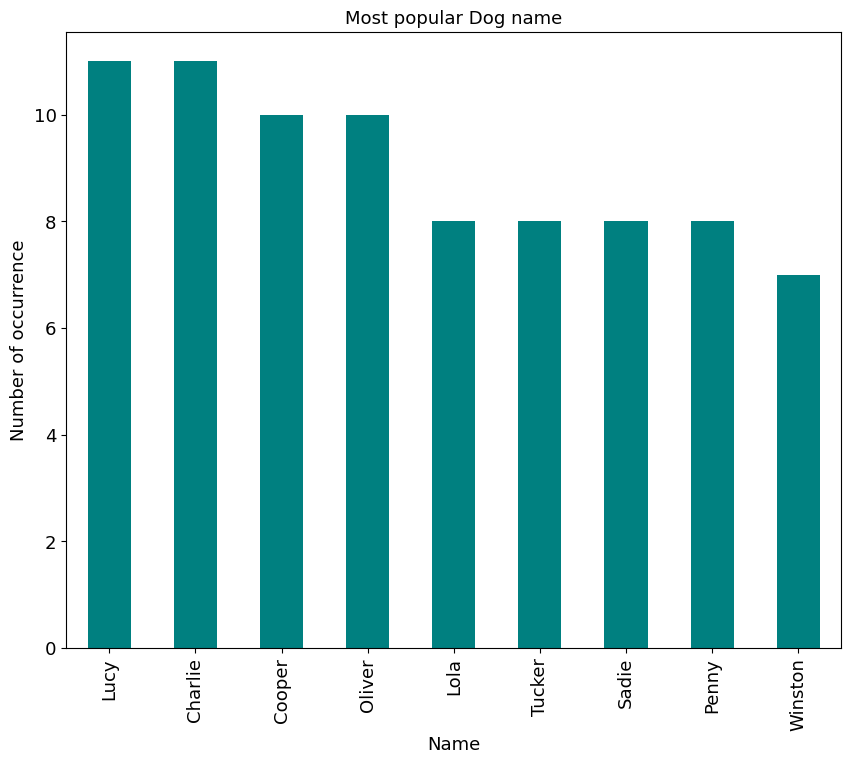

In [58]:
d_name= twitter.name.value_counts()[2:11]
#plot
d_bar = d_name.plot.bar(color = 'teal', fontsize = 13)

#figure size(width, height)
d_bar.figure.set_size_inches(10, 8);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

**Lucy** and **Charlie** are the most popular dog names as witnessed from the above visualization.

### 3: Most commonTwitter Source

In [59]:
# Get the value counts of each source in the `source` column and assign it to a variable
source_counts=twitter.source.value_counts()
source_counts

Twitter for iPhone     1707
Vine - Make a Scene      90
TweetDeck                11
Twitter Web Client       11
Name: source, dtype: int64

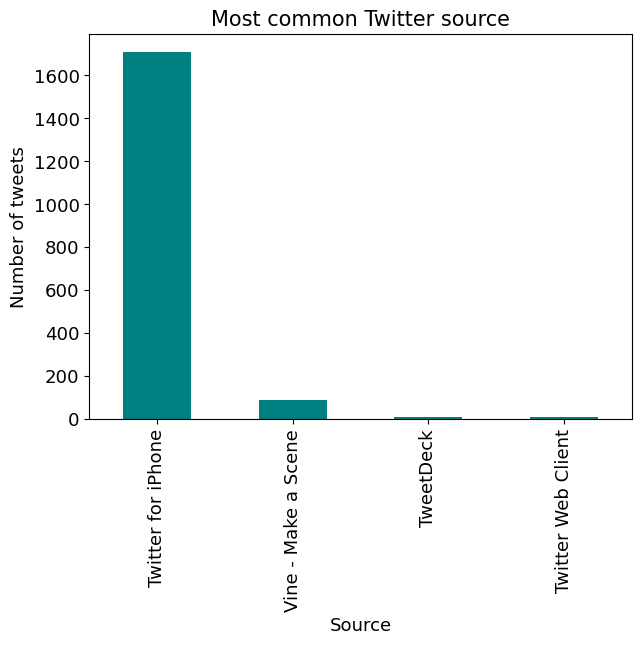

In [60]:
#plot
s_bar = source_counts.plot.bar(color = 'teal', fontsize = 13)

#figure size(width, height)
s_bar.figure.set_size_inches(7, 5);

#Add labels
plt.title('Most common Twitter source', color = 'black', fontsize = '15')
plt.xlabel('Source', color = 'black', fontsize = '13')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

The most used source was **Twitter for iPhone** followed by **Vine**

### 4: Is there a correlation between Favorite_count and Retweet_count?

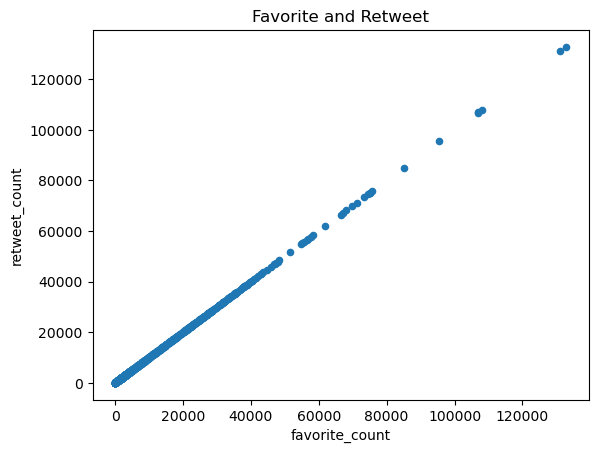

In [61]:
# Correlation between favorite_count and retweet_count
twitter.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');

In [62]:
 twitter['favorite_count'].corr(twitter['retweet_count'])

0.9999999999999999

There is a strong positive correlation between the 